In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
print(f"Total of images in test folder: {len(os.listdir('data/test/child')) + len(os.listdir('data/test/adult'))}")
print(f"\nTotal of images in train folder: {len(os.listdir('data/train/child')) + len(os.listdir('data/train/adult'))}")
print(f"\nTotal of images in validation folder: {len(os.listdir('data/val/child')) + len(os.listdir('data/val/adult'))}")

Total of images in test folder: 209

Total of images in train folder: 668

Total of images in validation folder: 167


In [15]:
# Importing necessary packages

import tensorflow as tf
from tensorflow import keras

## 4) CNN architecture

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setting the directory paths for the train, validation and test datasets
train_dir = 'data/train'
val_dir = 'data/val'
test_dir = 'data/test'

# Rescale images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of image data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=10,
        class_mode='binary')

val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=10,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=10,
        class_mode='binary')



Found 668 images belonging to 2 classes.
Found 167 images belonging to 2 classes.
Found 209 images belonging to 2 classes.


In [17]:
# Import necessary packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16

# Creating a ResNet50 model
base_model = VGG16(weights='imagenet',
                      include_top=False,
                      input_shape=(224, 224, 3))

# Creating a new model on top of the ResNet50 model
model_vgg16 = Sequential()
model_vgg16.add(base_model)
model_vgg16.add(Flatten())
model_vgg16.add(Dense(256, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(1, activation='sigmoid'))

# Freezing the ResNet50 model
base_model.trainable = False



In [18]:
from keras.optimizers import Adam

# Compiling the model
model_vgg16.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [19]:
# Training the model
H = model_vgg16.fit(
      train_generator,
      steps_per_epoch=len(train_generator),  # changed from 100
      epochs=60,
      validation_data=val_generator, 
      validation_steps=len(val_generator),  # changed from 50
      verbose=1)

Epoch 1/60
67/67 [==============================] - 4s 49ms/step - loss: 0.7209 - accuracy: 0.5988 - val_loss: 0.5439 - val_accuracy: 0.6946
Epoch 2/60
67/67 [==============================] - 3s 46ms/step - loss: 0.4323 - accuracy: 0.8129 - val_loss: 0.5122 - val_accuracy: 0.7365
Epoch 3/60
67/67 [==============================] - 3s 46ms/step - loss: 0.3628 - accuracy: 0.8383 - val_loss: 0.6127 - val_accuracy: 0.7006
Epoch 4/60
67/67 [==============================] - 3s 46ms/step - loss: 0.2419 - accuracy: 0.9132 - val_loss: 0.4408 - val_accuracy: 0.7904
Epoch 5/60
67/67 [==============================] - 3s 46ms/step - loss: 0.1819 - accuracy: 0.9476 - val_loss: 0.4422 - val_accuracy: 0.7964
Epoch 6/60
67/67 [==============================] - 3s 46ms/step - loss: 0.1461 - accuracy: 0.9491 - val_loss: 0.4552 - val_accuracy: 0.7784
Epoch 7/60
67/67 [==============================] - 3s 46ms/step - loss: 0.1153 - accuracy: 0.9731 - val_loss: 0.5037 - val_accuracy: 0.7425
Epoch 8/60
67

In [20]:
best_val_accuracy = max(H.history['val_accuracy'])
best_val_accuracy

0.832335352897644

In [21]:
# Evaluating the model on the test set
test_loss, test_acc = model_vgg16.evaluate(test_generator, verbose=1)
print('Test accuracy:', test_acc)

21/21 [==============================] - 1s 37ms/step - loss: 0.8699 - accuracy: 0.7847
Test accuracy: 0.7846890091896057


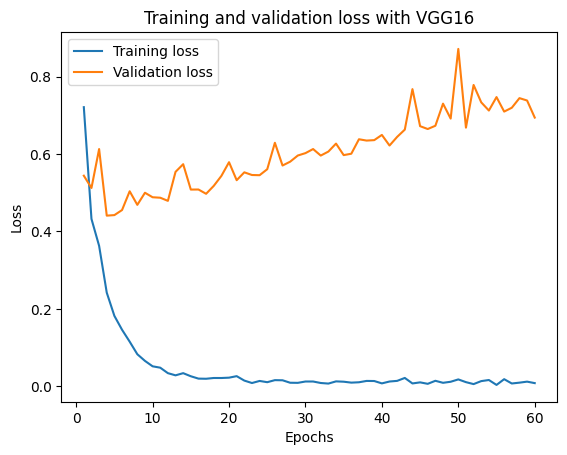

In [22]:
def loss_plotter(H):
    loss = H.history['loss']
    val_loss = H.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss with VGG16')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
 

loss_plotter(H)

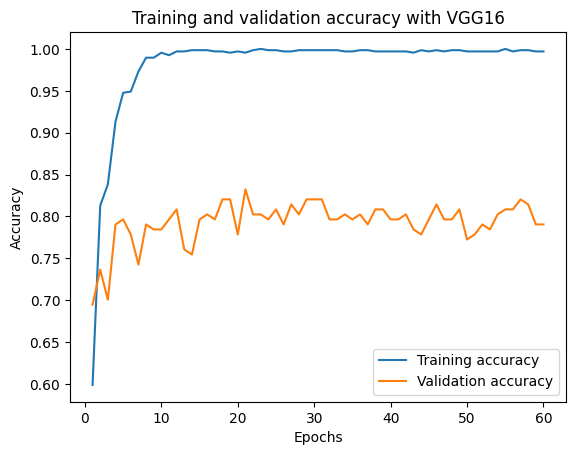

In [23]:
def accuracy_plotter(H):
    acc = H.history['accuracy']
    val_acc = H.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, label='Training accuracy')
    plt.plot(epochs, val_acc, label='Validation accuracy')
    plt.title('Training and validation accuracy with VGG16')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
accuracy_plotter(H)

In [24]:
#load libraries 
import numpy as np 
import tensorflow as tf 
import PIL 

#load GradCAM 
from tf_explain.core.grad_cam import GradCAM 

IMAGE_PATH = "data/test/child/childsmiling685.jpeg"
class_index = 713 

img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(224, 224)) 
img = tf.keras.preprocessing.image.img_to_array(img) 

model = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=True) 

# get model summary 
model.summary() 

#first create the input in a format that the explainer expects (a tuple) 
input_img = (np.array([img]), None) 

#initialize the explainer as an instance of the GradCAM object 
explainer = GradCAM() 

# Obtain explanations for your image using VGG 16 and GradCAM 
grid = explainer.explain(input_img, model, class_index=class_index ) 

# Save the resulting image 
explainer.save(grid, "./outputs/explain/", "grad_cam_occupied.png")

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     